https://colab.research.google.com/drive/1y0KnCFZvGVf_odSfcNAws6kcDD7HsI0L?usp=sharing#scrollTo=OObizjaFOhvl


###学习资料
以下是一些可以参考的资料：

Let’s build the GPT Tokenizer
https://github.com/karpathy/minbpe
https://huggingface.co/docs/tokenizers/index
https://tiktokenizer.vercel.app/
https://github.com/openai/tiktoken
https://github.com/google/sentencepiece

In [5]:
list("你好".encode("utf-8"))

[228, 189, 160, 229, 165, 189]

In [6]:

print("你好".encode("utf-8"))

b'\xe4\xbd\xa0\xe5\xa5\xbd'


In [1]:
x = ord("北")
y = ord("大")
print(x)
print(y)

21271
22823


In [4]:
a=chr(22823)
b=chr(27169)
c=chr(22411)
print(a,b,c)

大 模 型


In [3]:
text = "😊在中国传统文化中，😍正义和公平被视为社会和谐的基石。辜鸿铭先生认为，一个人之所以能够在中国社会中得到保护，不是因为物质力量的强大，而是因为他周围的每个人都认同并践行正义和公平的原则。这种道德责任感不仅体现在个人行为上，也贯穿于整个社会的运作机制中。人们相信，正义和公平作为一种无形的力量，比任何物质力量都更为重要。在中国，正义不仅仅是法律条文的规定，更是每个人内心深处的信仰。孔子曾说：“己所不欲，勿施于人。”这句话体现了儒家思想中的“仁爱”原则，即在处理人际关系时，应该站在对方的角度思考问题，避免伤害他人。这种思想使得中国人在日常生活中更加注重他人的感受，形成了相互尊重、互帮互助的社会氛围。"
text = "SentencePiece is an unsupervised text tokenizer and detokenizer mainly for Neural Network-based text generation systems where the vocabulary size is predetermined prior to the neural model training. SentencePiece implements subword units (e.g., byte-pair-encoding (BPE) [Sennrich et al.]) and unigram language model [Kudo.]) with the extension of direct training from raw sentences. SentencePiece allows us to make a purely end-to-end system that does not depend on language-specific pre/postprocessing."
tokens = text.encode("utf-8")
tokens = list(map(int,tokens))
top_number = max(tokens)
print(top_number)
print(len(tokens))
print(tokens)
print(tokens[1:])
#获取最大数量的组合对
def get_stats(ids):
    counts = {}
    for pair in zip(ids,ids[1:]):
        counts[pair] = counts.get(pair,0) + 1
    return counts

stats = get_stats(tokens)
print(sorted(( (v,k) for k,v in stats.items() ),reverse=True)) #python一般使用第一个元素进行排序，所以需要更换 k,v 位置

122
503
[83, 101, 110, 116, 101, 110, 99, 101, 80, 105, 101, 99, 101, 32, 105, 115, 32, 97, 110, 32, 117, 110, 115, 117, 112, 101, 114, 118, 105, 115, 101, 100, 32, 116, 101, 120, 116, 32, 116, 111, 107, 101, 110, 105, 122, 101, 114, 32, 97, 110, 100, 32, 100, 101, 116, 111, 107, 101, 110, 105, 122, 101, 114, 32, 109, 97, 105, 110, 108, 121, 32, 102, 111, 114, 32, 78, 101, 117, 114, 97, 108, 32, 78, 101, 116, 119, 111, 114, 107, 45, 98, 97, 115, 101, 100, 32, 116, 101, 120, 116, 32, 103, 101, 110, 101, 114, 97, 116, 105, 111, 110, 32, 115, 121, 115, 116, 101, 109, 115, 32, 119, 104, 101, 114, 101, 32, 116, 104, 101, 32, 118, 111, 99, 97, 98, 117, 108, 97, 114, 121, 32, 115, 105, 122, 101, 32, 105, 115, 32, 112, 114, 101, 100, 101, 116, 101, 114, 109, 105, 110, 101, 100, 32, 112, 114, 105, 111, 114, 32, 116, 111, 32, 116, 104, 101, 32, 110, 101, 117, 114, 97, 108, 32, 109, 111, 100, 101, 108, 32, 116, 114, 97, 105, 110, 105, 110, 103, 46, 32, 83, 101, 110, 116, 101, 110, 99, 101, 80, 10

In [4]:
top_pair = max(stats,key=stats.get)
top_pair

(101, 110)

In [13]:
chr(101),chr(110)

('e', 'n')

In [5]:
#合并组合对
def merge(ids, pair, idx):
    """
    In the list of integers (ids), replace all consecutive occurrences
    of pair with the new integer token idx
    Example: ids=[1, 2, 3, 1, 2], pair=(1, 2), idx=4 -> [4, 3, 4]
    """
    newids = []
    i = 0
    while i < len(ids):
        # if not at the very last position AND the pair matches, replace it
        if ids[i] == pair[0] and i < len(ids) - 1 and ids[i+1] == pair[1]:
            newids.append(idx)
            i += 2
        else:
            newids.append(ids[i])
            i += 1
    return newids

print(merge([1,2,3,1,2],(1,2),4))

tokens2 = merge(tokens,top_pair,256)
print(tokens2)
print(len(tokens2))

[4, 3, 4]
[83, 256, 116, 256, 99, 101, 80, 105, 101, 99, 101, 32, 105, 115, 32, 97, 110, 32, 117, 110, 115, 117, 112, 101, 114, 118, 105, 115, 101, 100, 32, 116, 101, 120, 116, 32, 116, 111, 107, 256, 105, 122, 101, 114, 32, 97, 110, 100, 32, 100, 101, 116, 111, 107, 256, 105, 122, 101, 114, 32, 109, 97, 105, 110, 108, 121, 32, 102, 111, 114, 32, 78, 101, 117, 114, 97, 108, 32, 78, 101, 116, 119, 111, 114, 107, 45, 98, 97, 115, 101, 100, 32, 116, 101, 120, 116, 32, 103, 256, 101, 114, 97, 116, 105, 111, 110, 32, 115, 121, 115, 116, 101, 109, 115, 32, 119, 104, 101, 114, 101, 32, 116, 104, 101, 32, 118, 111, 99, 97, 98, 117, 108, 97, 114, 121, 32, 115, 105, 122, 101, 32, 105, 115, 32, 112, 114, 101, 100, 101, 116, 101, 114, 109, 105, 110, 101, 100, 32, 112, 114, 105, 111, 114, 32, 116, 111, 32, 116, 104, 101, 32, 110, 101, 117, 114, 97, 108, 32, 109, 111, 100, 101, 108, 32, 116, 114, 97, 105, 110, 105, 110, 103, 46, 32, 83, 256, 116, 256, 99, 101, 80, 105, 101, 99, 101, 32, 105, 109, 11

In [ ]:
#迭代次数是一个超参，找到一个合理的平衡即可，gpt-4是10万个token
#迭代次数越多，词汇量越大，序列越短

In [6]:
vocab_size = 260 #最终词汇量
num_merges = vocab_size - 240
ids = list(tokens)
print(ids)

merges = {} #(int,int) -> int 记录合并的对
for i in range(num_merges):
    stats = get_stats(ids) #获得词源对的统计[(1:（12，234）),……] 
    pair = max(stats,key=stats.get) #找到出现次数最多的一对
    idx = 240+i #记录当前的编码最大值
    print(f"merging{pair} into a new token {idx}")
    ids=merge(ids,pair,idx)
    merges[pair] = idx


[83, 101, 110, 116, 101, 110, 99, 101, 80, 105, 101, 99, 101, 32, 105, 115, 32, 97, 110, 32, 117, 110, 115, 117, 112, 101, 114, 118, 105, 115, 101, 100, 32, 116, 101, 120, 116, 32, 116, 111, 107, 101, 110, 105, 122, 101, 114, 32, 97, 110, 100, 32, 100, 101, 116, 111, 107, 101, 110, 105, 122, 101, 114, 32, 109, 97, 105, 110, 108, 121, 32, 102, 111, 114, 32, 78, 101, 117, 114, 97, 108, 32, 78, 101, 116, 119, 111, 114, 107, 45, 98, 97, 115, 101, 100, 32, 116, 101, 120, 116, 32, 103, 101, 110, 101, 114, 97, 116, 105, 111, 110, 32, 115, 121, 115, 116, 101, 109, 115, 32, 119, 104, 101, 114, 101, 32, 116, 104, 101, 32, 118, 111, 99, 97, 98, 117, 108, 97, 114, 121, 32, 115, 105, 122, 101, 32, 105, 115, 32, 112, 114, 101, 100, 101, 116, 101, 114, 109, 105, 110, 101, 100, 32, 112, 114, 105, 111, 114, 32, 116, 111, 32, 116, 104, 101, 32, 110, 101, 117, 114, 97, 108, 32, 109, 111, 100, 101, 108, 32, 116, 114, 97, 105, 110, 105, 110, 103, 46, 32, 83, 101, 110, 116, 101, 110, 99, 101, 80, 105, 101, 

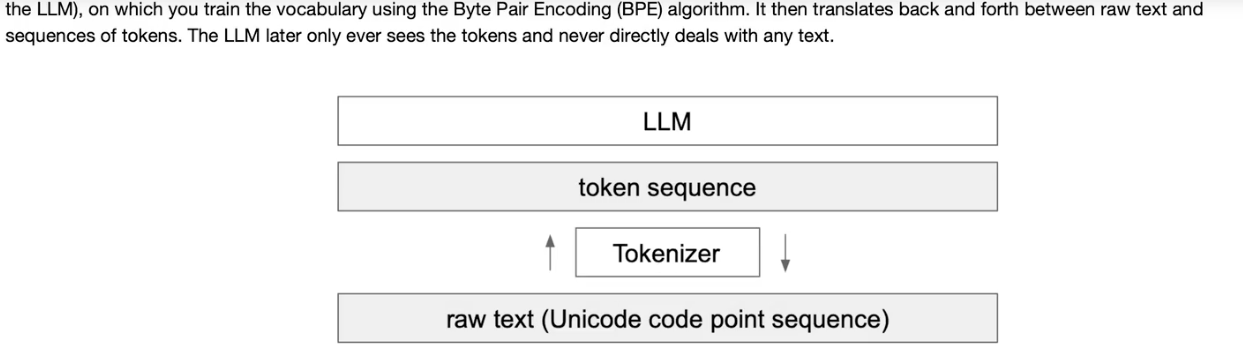

In [7]:
#43分钟开始聊编码器和解码器
vocab = {idx:bytes([idx]) for idx in range(256)}

for (p0,p1),idx in merges.items():
    vocab[idx] = vocab[p0] + vocab[p1]

print(idx)
print(vocab)

def decode(ids):
        # given ids (list of integers), return Python string
        text_bytes = b"".join(vocab[idx] for idx in ids)
        text = text_bytes.decode("utf-8", errors="replace")
        return text

print(decode([228]))

259
{0: b'\x00', 1: b'\x01', 2: b'\x02', 3: b'\x03', 4: b'\x04', 5: b'\x05', 6: b'\x06', 7: b'\x07', 8: b'\x08', 9: b'\t', 10: b'\n', 11: b'\x0b', 12: b'\x0c', 13: b'\r', 14: b'\x0e', 15: b'\x0f', 16: b'\x10', 17: b'\x11', 18: b'\x12', 19: b'\x13', 20: b'\x14', 21: b'\x15', 22: b'\x16', 23: b'\x17', 24: b'\x18', 25: b'\x19', 26: b'\x1a', 27: b'\x1b', 28: b'\x1c', 29: b'\x1d', 30: b'\x1e', 31: b'\x1f', 32: b' ', 33: b'!', 34: b'"', 35: b'#', 36: b'$', 37: b'%', 38: b'&', 39: b"'", 40: b'(', 41: b')', 42: b'*', 43: b'+', 44: b',', 45: b'-', 46: b'.', 47: b'/', 48: b'0', 49: b'1', 50: b'2', 51: b'3', 52: b'4', 53: b'5', 54: b'6', 55: b'7', 56: b'8', 57: b'9', 58: b':', 59: b';', 60: b'<', 61: b'=', 62: b'>', 63: b'?', 64: b'@', 65: b'A', 66: b'B', 67: b'C', 68: b'D', 69: b'E', 70: b'F', 71: b'G', 72: b'H', 73: b'I', 74: b'J', 75: b'K', 76: b'L', 77: b'M', 78: b'N', 79: b'O', 80: b'P', 81: b'Q', 82: b'R', 83: b'S', 84: b'T', 85: b'U', 86: b'V', 87: b'W', 88: b'X', 89: b'Y', 90: b'Z', 91: b

In [8]:
def encode( text):
        # given a string text, return the token ids
        text_bytes = text.encode("utf-8") # raw bytes
        ids = list(text_bytes) # list of integers in range 0..255
        while len(ids) >= 2:
            # find the pair with the lowest merge index
            stats = get_stats(ids)
            pair = min(stats, key=lambda p: merges.get(p, float("inf")))
            # subtle: if there are no more merges available, the key will
            # result in an inf for every single pair, and the min will be
            # just the first pair in the list, arbitrarily
            # we can detect this terminating case by a membership check
            if pair not in merges:
                break # nothing else can be merged anymore
            # otherwise let's merge the best pair (lowest merge index)
            idx = merges[pair]
            ids = merge(ids, pair, idx)
        return ids


text_1 = "😊在中国传统文化中"
tokens_1 = text.encode("utf-8")
tokens_1 = list(map(int,tokens))

print(tokens_1)
print(encode(text_1))
    

[83, 101, 110, 116, 101, 110, 99, 101, 80, 105, 101, 99, 101, 32, 105, 115, 32, 97, 110, 32, 117, 110, 115, 117, 112, 101, 114, 118, 105, 115, 101, 100, 32, 116, 101, 120, 116, 32, 116, 111, 107, 101, 110, 105, 122, 101, 114, 32, 97, 110, 100, 32, 100, 101, 116, 111, 107, 101, 110, 105, 122, 101, 114, 32, 109, 97, 105, 110, 108, 121, 32, 102, 111, 114, 32, 78, 101, 117, 114, 97, 108, 32, 78, 101, 116, 119, 111, 114, 107, 45, 98, 97, 115, 101, 100, 32, 116, 101, 120, 116, 32, 103, 101, 110, 101, 114, 97, 116, 105, 111, 110, 32, 115, 121, 115, 116, 101, 109, 115, 32, 119, 104, 101, 114, 101, 32, 116, 104, 101, 32, 118, 111, 99, 97, 98, 117, 108, 97, 114, 121, 32, 115, 105, 122, 101, 32, 105, 115, 32, 112, 114, 101, 100, 101, 116, 101, 114, 109, 105, 110, 101, 100, 32, 112, 114, 105, 111, 114, 32, 116, 111, 32, 116, 104, 101, 32, 110, 101, 117, 114, 97, 108, 32, 109, 111, 100, 101, 108, 32, 116, 114, 97, 105, 110, 105, 110, 103, 46, 32, 83, 101, 110, 116, 101, 110, 99, 101, 80, 105, 101, 

In [9]:
print(decode(encode("hello world")))

hello world


In [10]:
text2 = decode(encode(text))
print(text2 == text)

True


###Forced splits using regex patterns (GPT series)

In [11]:
import regex as re
gpt2pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")

print(re.findall(gpt2pat, "Hello've world123 how's are you!!!?"))

['Hello', "'ve", ' world', '123', ' how', "'s", ' are', ' you', '!!!?']


In [12]:
example = """
for i in range(1, 101):
    if i % 3 == 0 and i % 5 == 0:
        print("FizzBuzz")
    elif i % 3 == 0:
        print("Fizz")
    elif i % 5 == 0:
        print("Buzz")
    else:
        print(i)
"""
print(re.findall(gpt2pat, example))

['\n', 'for', ' i', ' in', ' range', '(', '1', ',', ' 101', '):', '\n   ', ' if', ' i', ' %', ' 3', ' ==', ' 0', ' and', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', '("', 'FizzBuzz', '")', '\n   ', ' elif', ' i', ' %', ' 3', ' ==', ' 0', ':', '\n       ', ' print', '("', 'Fizz', '")', '\n   ', ' elif', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', '("', 'Buzz', '")', '\n   ', ' else', ':', '\n       ', ' print', '(', 'i', ')', '\n']


In [13]:
import tiktoken

# GPT-2 (does not merge spaces)
enc = tiktoken.get_encoding("gpt2")
print(enc.encode("    hello world!!!"))

# GPT-4 (merges spaces)
enc = tiktoken.get_encoding("cl100k_base")
print(enc.encode("    hello world!!!"))



[220, 220, 220, 23748, 995, 10185]
[262, 24748, 1917, 12340]


Reference the GPT-2 encoder.py Download the vocab.bpe and encoder.json files.

In [14]:
!wget https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/vocab.bpe
!wget https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/encoder.json

zsh:1: command not found: wget
zsh:1: command not found: wget


In [17]:
import os, json

with open('encoder.json', 'r') as f:
    encoder = json.load(f) # <--- ~equivalent to our "vocab"

with open('vocab.bpe', 'r', encoding="utf-8") as f:
    bpe_data = f.read()
bpe_merges = [tuple(merge_str.split()) for merge_str in bpe_data.split('\n')[1:-1]]
# ^---- ~equivalent to our "merges"

### special tokens

In [18]:
import os,json
len(encoder) #gpt2 50257  , 256个基础，50000 merges +1 special token

50257

In [19]:
encoder

{'!': 0,
 '"': 1,
 '#': 2,
 '$': 3,
 '%': 4,
 '&': 5,
 "'": 6,
 '(': 7,
 ')': 8,
 '*': 9,
 '+': 10,
 ',': 11,
 '-': 12,
 '.': 13,
 '/': 14,
 '0': 15,
 '1': 16,
 '2': 17,
 '3': 18,
 '4': 19,
 '5': 20,
 '6': 21,
 '7': 22,
 '8': 23,
 '9': 24,
 ':': 25,
 ';': 26,
 '<': 27,
 '=': 28,
 '>': 29,
 '?': 30,
 '@': 31,
 'A': 32,
 'B': 33,
 'C': 34,
 'D': 35,
 'E': 36,
 'F': 37,
 'G': 38,
 'H': 39,
 'I': 40,
 'J': 41,
 'K': 42,
 'L': 43,
 'M': 44,
 'N': 45,
 'O': 46,
 'P': 47,
 'Q': 48,
 'R': 49,
 'S': 50,
 'T': 51,
 'U': 52,
 'V': 53,
 'W': 54,
 'X': 55,
 'Y': 56,
 'Z': 57,
 '[': 58,
 '\\': 59,
 ']': 60,
 '^': 61,
 '_': 62,
 '`': 63,
 'a': 64,
 'b': 65,
 'c': 66,
 'd': 67,
 'e': 68,
 'f': 69,
 'g': 70,
 'h': 71,
 'i': 72,
 'j': 73,
 'k': 74,
 'l': 75,
 'm': 76,
 'n': 77,
 'o': 78,
 'p': 79,
 'q': 80,
 'r': 81,
 's': 82,
 't': 83,
 'u': 84,
 'v': 85,
 'w': 86,
 'x': 87,
 'y': 88,
 'z': 89,
 '{': 90,
 '|': 91,
 '}': 92,
 '~': 93,
 '¡': 94,
 '¢': 95,
 '£': 96,
 '¤': 97,
 '¥': 98,
 '¦': 99,
 '§': 100

In [20]:
encoder['<|endoftext|>'] #结束 意味着记忆清楚 ，后续的对话内容与之前再无关系

50256

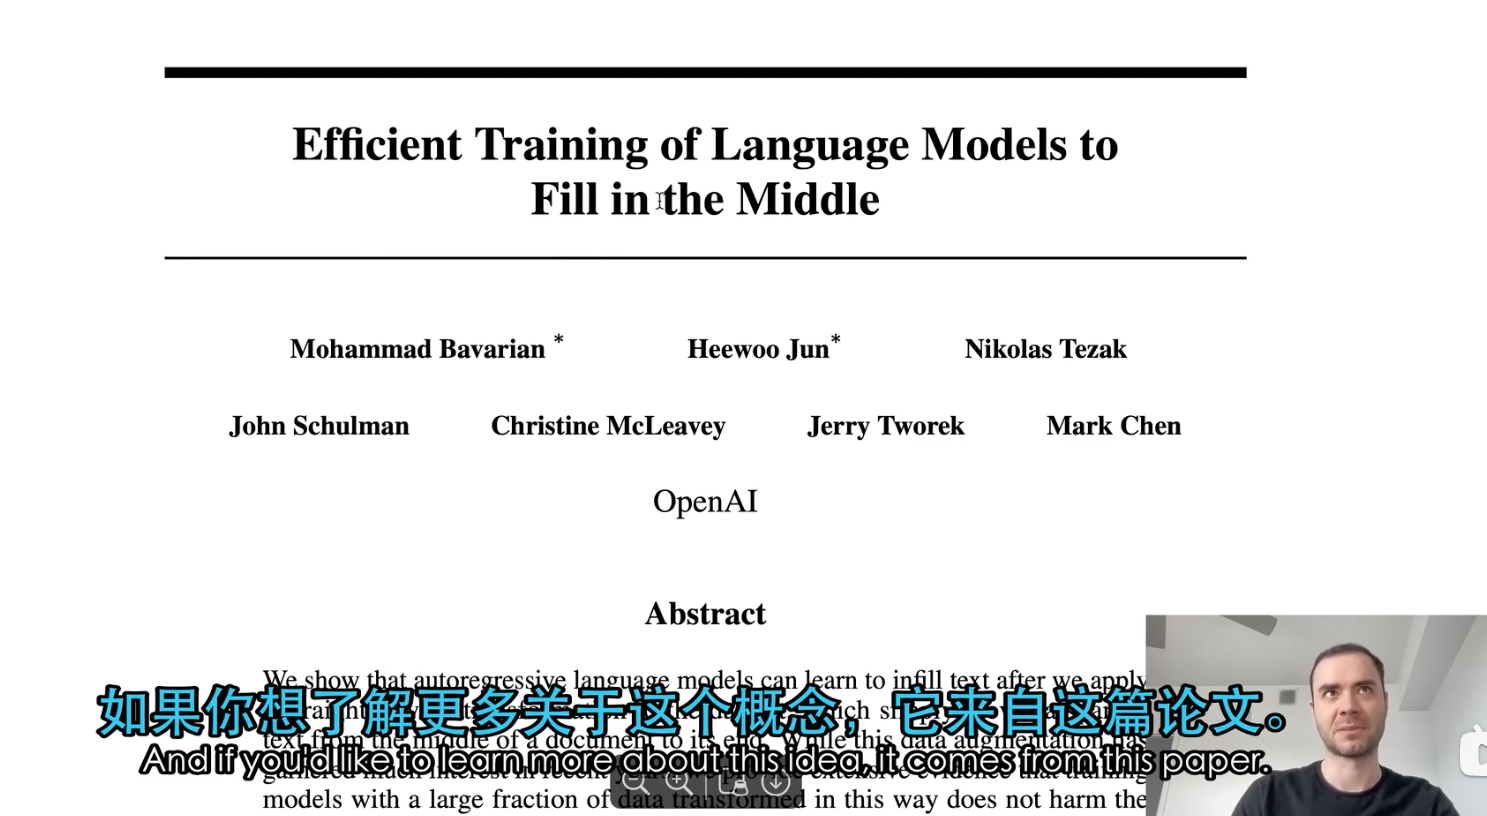

###minbpe exercise

In [21]:
import tiktoken
enc = tiktoken.get_encoding("cl100k_base") # GPT-4 tokenizer
print(enc.encode("안녕하세요 👋 (hello in Korean!)"))
print(enc.decode(enc.encode("안녕하세요 👋 (hello in Korean!)")) == "안녕하세요 👋 (hello in Korean!)")
# match the above for your own tokenizer, and also implement a train() function

[31495, 230, 75265, 243, 92245, 62904, 233, 320, 15339, 304, 16526, 16715]
True


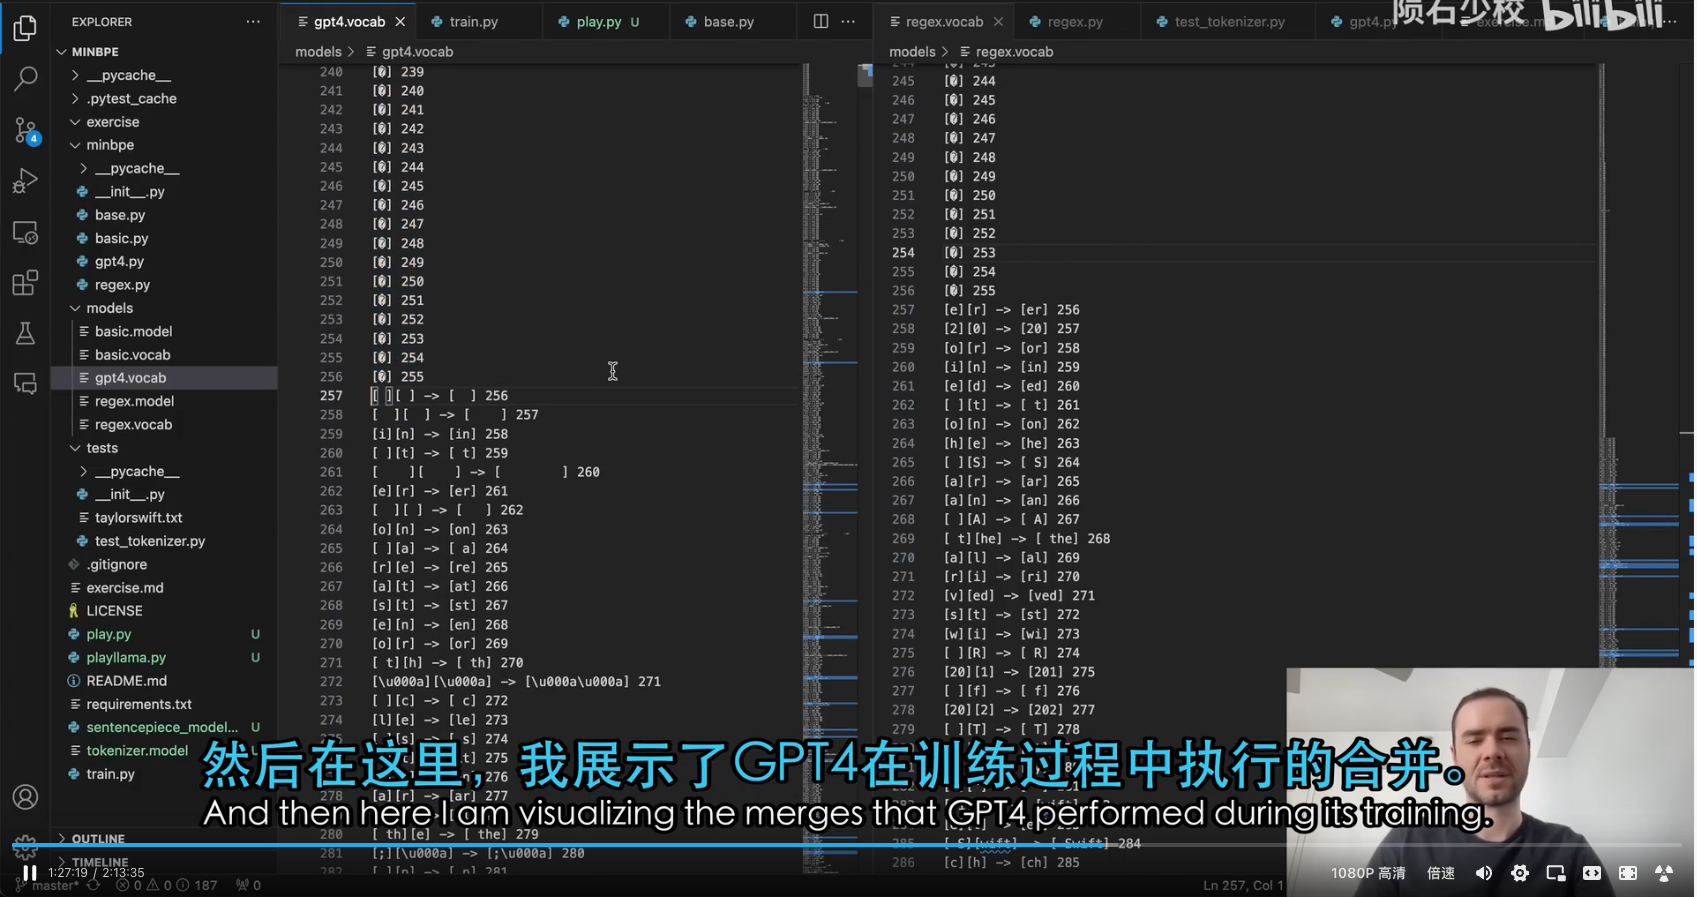

### sentencepiece

Commonly used because (unlike tiktoken) it can efficiently both train and inference BPE tokenizers. It is used in both Llama and Mistral series.

sentencepiece on Github link.

The big difference: sentencepiece runs BPE on the Unicode code points directly! It then has an option character_coverage for what to do with very very rare codepoints that appear very few times, and it either maps them onto an UNK token, or if byte_fallback is turned on, it encodes them with utf-8 and then encodes the raw bytes instead.

TLDR:

tiktoken encodes to utf-8 and then BPEs bytes
sentencepiece BPEs the code points and optionally falls back to utf-8 bytes for rare code points (rarity is determined by character_coverage hyperparameter), which then get translated to byte tokens.
(Personally I think the tiktoken way is a lot cleaner...)

In [23]:
import sentencepiece as spm

with open("toy.txt","w",encoding="utf-8") as f:
    f.write("SentencePiece is an unsupervised text tokenizer and detokenizer mainly for Neural Network-based text generation systems where the vocabulary size is predetermined prior to the neural model training. SentencePiece implements subword units (e.g., byte-pair-encoding (BPE) [Sennrich et al.]) and unigram language model [Kudo.]) with the extension of direct training from raw sentences. SentencePiece allows us to make a purely end-to-end system that does not depend on language-specific pre/postprocessing.")

In [24]:
# train a sentencepiece model on it
# the settings here are (best effort) those used for training Llama 2
import os

options = dict(
  # input spec
  input="toy.txt",
  input_format="text",
  # output spec
  model_prefix="tok400", # output filename prefix
  # algorithm spec
  # BPE alg
  model_type="bpe",
  vocab_size=400,
  # normalization
  normalization_rule_name="identity", # ew, turn off normalization
  remove_extra_whitespaces=False,
  input_sentence_size=200000000, # max number of training sentences
  max_sentence_length=4192, # max number of bytes per sentence
  seed_sentencepiece_size=1000000,
  shuffle_input_sentence=True,
  # rare word treatment
  character_coverage=0.99995,
  byte_fallback=True,
  # merge rules
  split_digits=True,
  split_by_unicode_script=True,
  split_by_whitespace=True,
  split_by_number=True,
  max_sentencepiece_length=16,
  add_dummy_prefix=True,
  allow_whitespace_only_pieces=True,
  # special tokens
  unk_id=0, # the UNK token MUST exist
  bos_id=1, # the others are optional, set to -1 to turn off
  eos_id=2,
  pad_id=-1,
  # systems
  num_threads=os.cpu_count(), # use ~all system resources
)

spm.SentencePieceTrainer.train(**options)


sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: toy.txt
  input_format: text
  model_prefix: tok400
  model_type: BPE
  vocab_size: 400
  self_test_sample_size: 0
  character_coverage: 0.99995
  input_sentence_size: 200000000
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 8
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 1
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 1
  required_chars: 
  byte_fallback: 1
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  diffe

In [25]:
sp = spm.SentencePieceProcessor()
sp.load('tok400.model')
vocab = [[sp.id_to_piece(idx), idx] for idx in range(sp.get_piece_size())]
vocab

[['<unk>', 0],
 ['<s>', 1],
 ['</s>', 2],
 ['<0x00>', 3],
 ['<0x01>', 4],
 ['<0x02>', 5],
 ['<0x03>', 6],
 ['<0x04>', 7],
 ['<0x05>', 8],
 ['<0x06>', 9],
 ['<0x07>', 10],
 ['<0x08>', 11],
 ['<0x09>', 12],
 ['<0x0A>', 13],
 ['<0x0B>', 14],
 ['<0x0C>', 15],
 ['<0x0D>', 16],
 ['<0x0E>', 17],
 ['<0x0F>', 18],
 ['<0x10>', 19],
 ['<0x11>', 20],
 ['<0x12>', 21],
 ['<0x13>', 22],
 ['<0x14>', 23],
 ['<0x15>', 24],
 ['<0x16>', 25],
 ['<0x17>', 26],
 ['<0x18>', 27],
 ['<0x19>', 28],
 ['<0x1A>', 29],
 ['<0x1B>', 30],
 ['<0x1C>', 31],
 ['<0x1D>', 32],
 ['<0x1E>', 33],
 ['<0x1F>', 34],
 ['<0x20>', 35],
 ['<0x21>', 36],
 ['<0x22>', 37],
 ['<0x23>', 38],
 ['<0x24>', 39],
 ['<0x25>', 40],
 ['<0x26>', 41],
 ['<0x27>', 42],
 ['<0x28>', 43],
 ['<0x29>', 44],
 ['<0x2A>', 45],
 ['<0x2B>', 46],
 ['<0x2C>', 47],
 ['<0x2D>', 48],
 ['<0x2E>', 49],
 ['<0x2F>', 50],
 ['<0x30>', 51],
 ['<0x31>', 52],
 ['<0x32>', 53],
 ['<0x33>', 54],
 ['<0x34>', 55],
 ['<0x35>', 56],
 ['<0x36>', 57],
 ['<0x37>', 58],
 ['<0x38>', 5

In [26]:
ids = sp.encode("hello 안녕하세요")
print(ids)

[362, 378, 361, 372, 358, 362, 239, 152, 139, 238, 136, 152, 240, 152, 155, 239, 135, 187, 239, 157, 151]


In [27]:
print([sp.id_to_piece(idx) for idx in ids])

['▁', 'h', 'e', 'l', 'lo', '▁', '<0xEC>', '<0x95>', '<0x88>', '<0xEB>', '<0x85>', '<0x95>', '<0xED>', '<0x95>', '<0x98>', '<0xEC>', '<0x84>', '<0xB8>', '<0xEC>', '<0x9A>', '<0x94>']


Llama 2 tokenizer proto If you'd like to export the raw protocol buffer for the tokenizer.model released by meta, this is a helpful issue. And this is the result:

In [ ]:
normalizer_spec {
  name: "identity"
  precompiled_charsmap: ""
  add_dummy_prefix: true
  remove_extra_whitespaces: false
  normalization_rule_tsv: ""
}

trainer_spec {
  input: "/large_experiments/theorem/datasets/MERGED/all.test1.merged"
  model_prefix: "spm_model_32k_200M_charcov099995_allowWSO__v2"
  model_type: BPE
  vocab_size: 32000
  self_test_sample_size: 0
  input_format: "text"
  character_coverage: 0.99995
  input_sentence_size: 200000000
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  num_threads: 80
  num_sub_iterations: 2
  max_sentence_length: 4192
  shuffle_input_sentence: true
  max_sentencepiece_length: 16
  split_by_unicode_script: true
  split_by_whitespace: true
  split_by_number: true
  treat_whitespace_as_suffix: false
  split_digits: true
  allow_whitespace_only_pieces: true
  vocabulary_output_piece_score: true
  hard_vocab_limit: true
  use_all_vocab: false
  byte_fallback: true
  required_chars: ""
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_surface: " \342\201\207 "
  unk_piece: "<unk>"
  bos_piece: "<s>"
  eos_piece: "</s>"
  pad_piece: "<pad>"
  train_extremely_large_corpus: false
  enable_differential_privacy: false
  differential_privacy_noise_level: 0.0
  differential_privacy_clipping_threshold: 0
}

### wocab size 大小的讨论 
视频中1:44左右 相关论文如下可以探索

引入新词汇到语境时

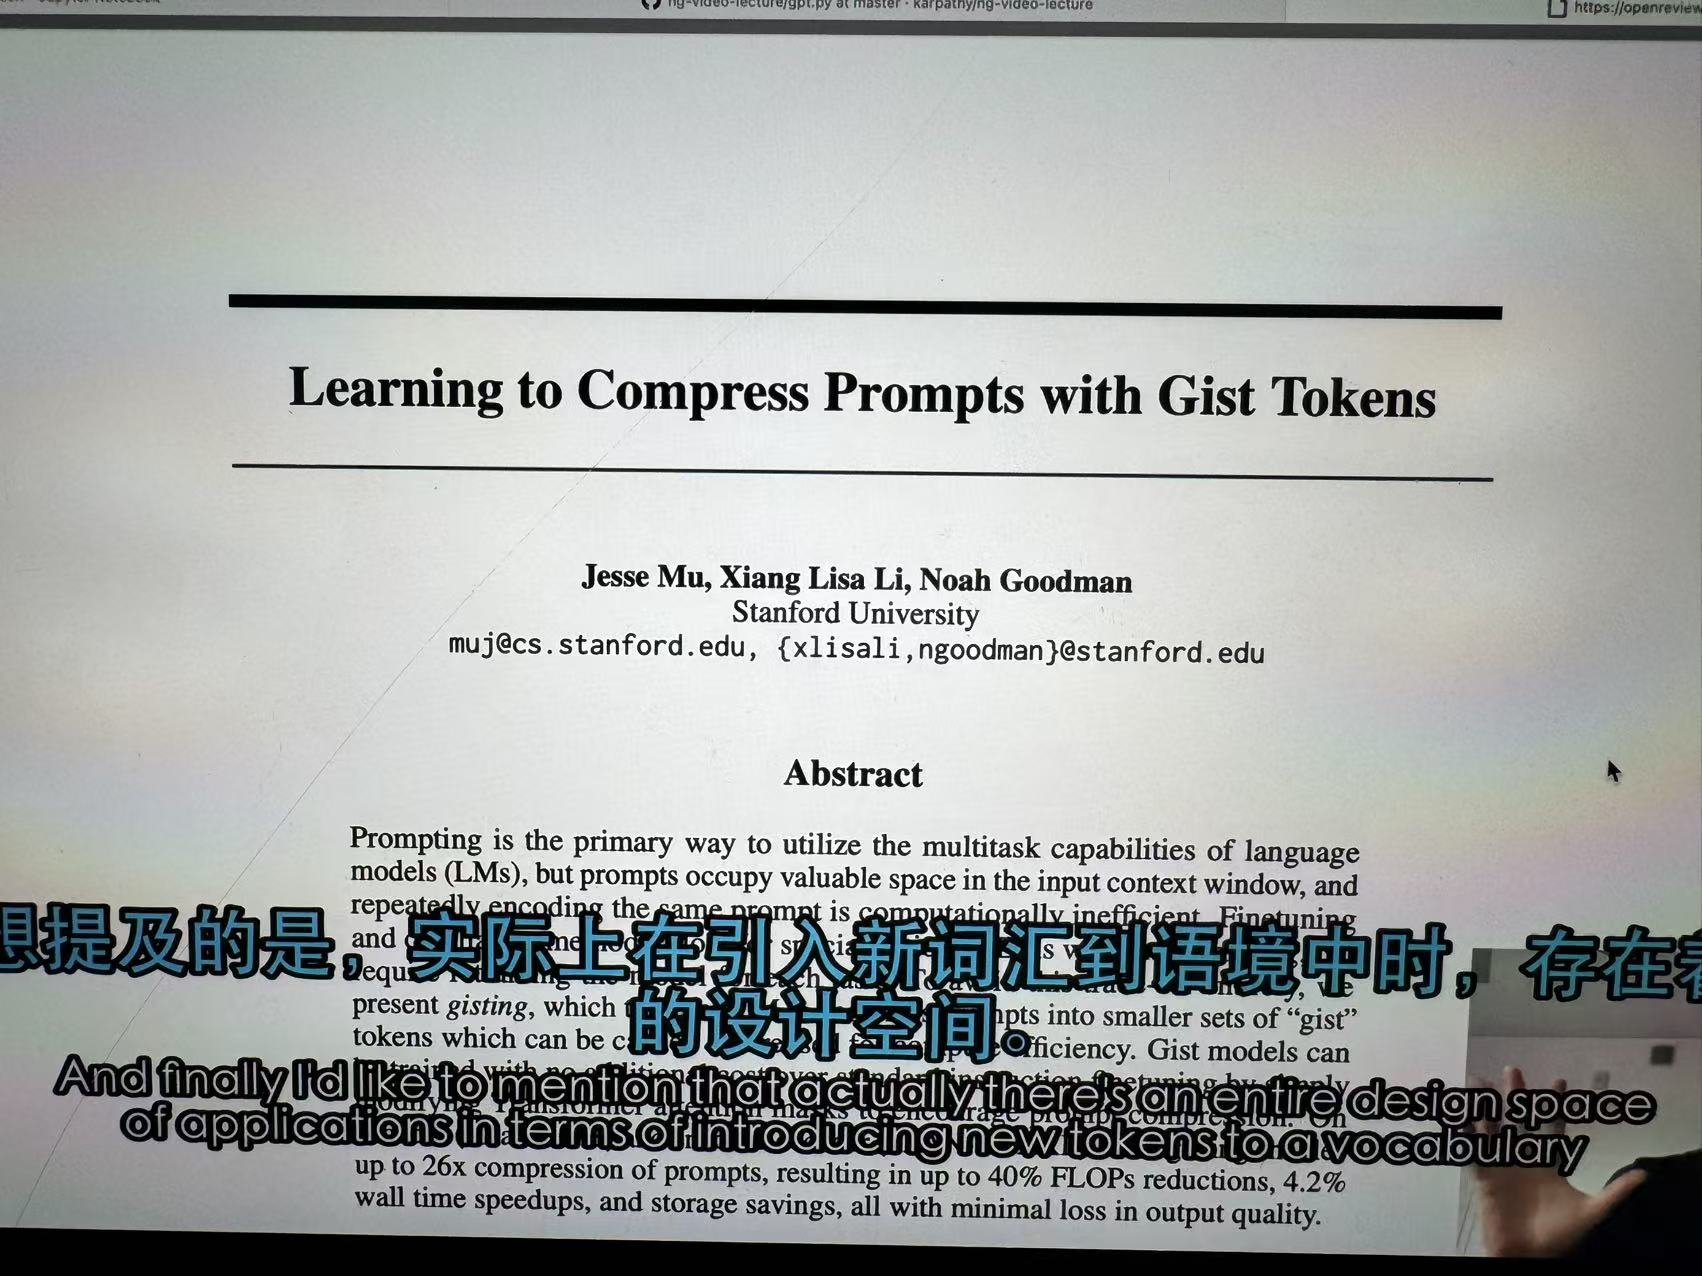

In [ ]:
test test commit2